In [3]:
import pandas as pd

In [4]:
df1 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Analise_de_Dados_com_Python_e_Pandas/datasets/Aracaju.xlsx')
df2 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Analise_de_Dados_com_Python_e_Pandas/datasets/Fortaleza.xlsx')
df3 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Analise_de_Dados_com_Python_e_Pandas/datasets/Natal.xlsx')
df4 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Analise_de_Dados_com_Python_e_Pandas/datasets/Recife.xlsx')
df5 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Analise_de_Dados_com_Python_e_Pandas/datasets/Salvador.xlsx')

In [5]:
df5.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Salvador,2018-01-01,31.06,1037,3
1,Salvador,2018-01-01,19.02,1034,3
2,Salvador,2019-02-10,173.59,1035,3
3,Salvador,2019-02-10,176.34,1037,3
4,Salvador,2019-02-14,19.47,1037,3


In [6]:
# Concatenando (juntando todos os arquivos) para formar a tabela completa
df = pd.concat([df1,df2,df3,df4,df5])

In [7]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [8]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [9]:
df.sample(5)  # Pega 5 amostras do nosso conjunto de dados (aleatóriamente)

,Cidade,Data,Vendas,LojaID,Qtde
104,Aracaju,2018-01-01,46.96,1522,1
34,Recife,2019-01-01,24.97,980,5
48,Salvador,2019-01-01,127.28,1035,2
164,Natal,2019-01-02,6.59,1035,1
15,Fortaleza,2019-01-01,195.05,1002,2


In [10]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [11]:
df['LojaID'] = df['LojaID'].astype('object') # Convertendo o tipo de dado da coluna LojaID de 'int' para 'object' (não é necessário)

In [12]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [13]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [14]:
df.isnull().sum()  # Era pra ter 7 vendas com valores nulos (mas n tem pq as tabelas já chegaram limpas)

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

### O Inplace é para salvar a alteração na variável (sem precisar declarar ela no começo da linha)

In [15]:
# Substituindo os valores nulos pela média
df['Vendas'].fillna(df['Vendas'].mean(), inplace=True)  # Estamos dizendo que queremos que o objeto seja preenchido em memória (continua nulo, porém podemos trabalhar, com o valor substituido em memória)

In [16]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [17]:
df['Vendas'].mean()  # As 7 linhas com valores nulos serão substituídos pela média (122,61)

122.61180089485438

In [18]:
# Substituindo os valores nulos por 0
df['Vendas'].fillna(0, inplace=True)

In [19]:
# Apagando as linhas com valores nulos
df.dropna(inplace=True)

In [20]:
# Dropando linhas que contém, exclusivamente, valores nulos na coluna de Vendas
df.dropna(subset=['Vendas'], inplace=True)

In [21]:
# Removendo linhas que estejam com valores faltantes em todas as colunas 
df.dropna(how='all', inplace=True)

### Criando novas colunas

In [22]:
df['Receita'] = df['Vendas'] * df['Qtde']  # Criando a coluna receita (valor da venda * qntd vendas)

In [23]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [24]:
# Poderíamos fazer o caminho inverso pra descobrir a quantidade de vendas
df['Receita/Vendas'] = df['Receita'] / df['Vendas']

In [25]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [26]:
df['Receita'].max()

3544.0

In [27]:
df['Receita'].min()

3.34

In [28]:
# nlargest podemos escolher 'n' valores maiores com base em uma coluna
df.nlargest(3, 'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [29]:
# nsmallest

In [30]:
df.nsmallest(3, 'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [31]:
# Agrupamento por cidade
df.groupby('Cidade')['Receita'].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [32]:
df.sort_values('Receita', ascending=False).head(10)  # Sorteando as 10 maiores receitas

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


# **Trabalhando com Datas**

In [33]:
df['Data'] = df['Data'].astype('int64')

In [34]:
df.dtypes

Cidade             object
Data                int64
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
Receita/Vendas    float64
dtype: object

In [35]:
# Vamos pegar essa coluna de data que está no formato de int para transformar em datetype

In [36]:
df['Data'] = pd.to_datetime(df['Data'])

In [37]:
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [38]:
# Agrupamento de receita por ano
df.groupby(df['Data'].dt.year)['Receita'].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [39]:
# Criando uma nova coluna com o ano
df['Ano_Venda'] = df['Data'].dt.year

In [40]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda
9,Salvador,2019-01-01,127.92,1036,1,127.92,1.0,2019
96,Natal,2019-01-02,42.94,1034,3,128.82,3.0,2019
49,Fortaleza,2019-01-01,183.33,1002,6,1099.98,6.0,2019
75,Aracaju,2018-01-01,160.64,1523,9,1445.76,9.0,2018
179,Natal,2019-01-02,64.95,1036,1,64.95,1.0,2019


In [41]:
# Extraindo o mês e o dia da venda (Criando e extraindo as duas novas colunas ao mesmo tempo)
df['mes_venda'], df['dia_venda'] = (df['Data'].dt.month, df['Data'].dt.day)
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda
93,Recife,2019-01-01,17.45,980,6,104.70,6.0,2019,1,1
123,Natal,2019-01-02,127.45,1036,3,382.35,3.0,2019,1,2
79,Recife,2019-01-01,14.53,983,6,87.18,6.0,2019,1,1
65,Aracaju,2018-01-01,145.54,1522,3,436.62,3.0,2018,1,1
139,Natal,2019-01-02,169.01,1036,1,169.01,1.0,2019,1,2


In [42]:
# Retornando a data mais antiga
df['Data'].min()

Timestamp('2018-01-01 00:00:00')

In [43]:
# Calculando a diferença de dias de cada venda para o primeiro dia
df['diferenca_dias'] = df['Data'] - df['Data'].min()
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias
138,Recife,2019-03-02,150.38,983,6,902.28,6.0,2019,3,2,425 days
16,Fortaleza,2019-01-01,97.32,1002,5,486.60,5.0,2019,1,1,365 days
124,Recife,2019-03-02,47.98,983,7,335.86,7.0,2019,3,2,425 days
83,Salvador,2019-01-01,63.66,1036,2,127.32,2.0,2019,1,1,365 days
114,Natal,2019-01-02,25.52,1034,1,25.52,1.0,2019,1,2,366 days


In [44]:
# Criando a coluna de trimestre
df['trimestre_venda'] = df['Data'].dt.quarter
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
80,Aracaju,2018-01-01,121.77,1523,3,365.31,3.0,2018,1,1,0 days,1
25,Salvador,2019-01-01,220.62,1035,1,220.62,1.0,2019,1,1,365 days,1
56,Recife,2019-01-01,7.98,983,5,39.90,5.0,2019,1,1,365 days,1
209,Natal,2019-01-02,69.98,1034,2,139.96,2.0,2019,1,2,366 days,1
18,Aracaju,2018-01-01,32.14,1522,6,192.84,6.0,2018,1,1,0 days,1


In [45]:
# Filtrando as vendas de 2019 do mês de março
vendas_marco_19 = df.loc[(df['Data'].dt.year == 2019) & (df['Data'].dt.month == 3)]
vendas_marco_19.sample(20)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
4,Natal,2019-03-09,699.00,853,3,2097.00,3.0,2019,3,9,432 days,1
141,Fortaleza,2019-03-02,182.75,983,8,1462.00,8.0,2019,3,2,425 days,1
117,Recife,2019-03-02,15.42,983,8,123.36,8.0,2019,3,2,425 days,1
122,Recife,2019-03-02,235.06,983,3,705.18,3.0,2019,3,2,425 days,1
122,Salvador,2019-03-02,13.27,1037,1,13.27,1.0,2019,3,2,425 days,1
136,Fortaleza,2019-03-02,39.09,982,4,156.36,4.0,2019,3,2,425 days,1
2,Natal,2019-03-11,308.00,852,3,924.00,3.0,2019,3,11,434 days,1
141,Recife,2019-03-02,182.75,983,8,1462.00,8.0,2019,3,2,425 days,1
135,Salvador,2019-03-02,9.95,1037,3,29.85,3.0,2019,3,2,425 days,1
74,Natal,2019-03-10,303.00,854,3,909.00,3.0,2019,3,10,433 days,1


# **Visualização de dados**

In [46]:
df['LojaID'].value_counts(ascending=False)  # Conta quantas linhas nós temos para cada valor da coluna 'LojaID'

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1002     30
1005     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

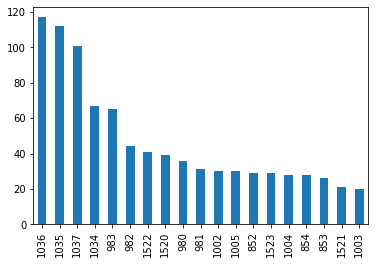

In [47]:
# Gráfico de barras com total de vendas por LojaID
df['LojaID'].value_counts(ascending=False).plot.bar()

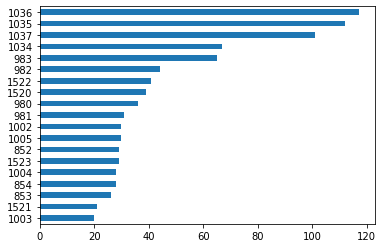

In [48]:
# Gráfico horizontal
df['LojaID'].value_counts(ascending=True).plot.barh(); # O ';' retira um obj que vem junto do gráfico (dps tira o ; para visualizar)

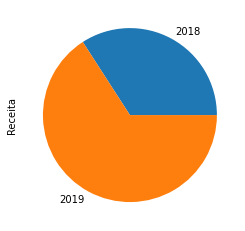

In [49]:
# Gráfico de Pizza
df.groupby(df['Data'].dt.year)['Receita'].sum().plot.pie()  # Aqui vou deixar sem o ';' para visualizar

In [50]:
# Total de vendas por cidade
df['Cidade'].value_counts()

Salvador     240
Natal        240
Recife       142
Fortaleza    142
Aracaju      130
Name: Cidade, dtype: int64

Text(0.5, 0, 'Total Vendas')

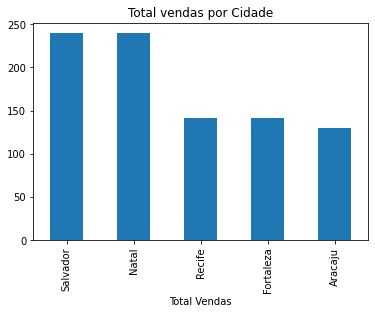

In [51]:
# Adicionando um título e alterando o nome dos eixos 
import matplotlib.pyplot as plt
df['Cidade'].value_counts().plot.bar(title='Total vendas por Cidade')
plt.xlabel('Cidade')
plt.xlabel('Total Vendas')

Text(0.5, 0, 'Total Vendas')

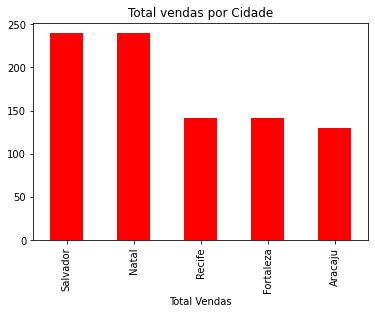

In [52]:
# Alterando a cor 
df['Cidade'].value_counts().plot.bar(title='Total vendas por Cidade', color='red')
plt.xlabel('Cidade')
plt.xlabel('Total Vendas')

In [53]:
# Alterando o estilo
plt.style.use('ggplot')  # Dps procurar pela documentação do matplotlib

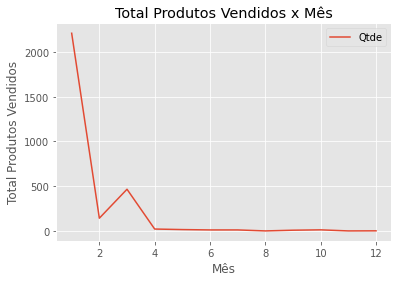

In [54]:
df.groupby(df['mes_venda'])['Qtde'].sum().plot(title = 'Total Produtos Vendidos x Mês')
plt.xlabel('Mês')  # Eixo x
plt.ylabel('Total Produtos Vendidos')  # Eixo y
plt.legend()

In [56]:
df.groupby(df['mes_venda'])['Qtde'].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [57]:
# Selecionando apenas as vendas de 2019
df_2019 = df[df['Ano_Venda'] == 2019]

In [62]:
df_2019.groupby(df_2019['mes_venda'])['Qtde'].sum()

mes_venda
1    1541
2     128
3     460
4      12
Name: Qtde, dtype: int64

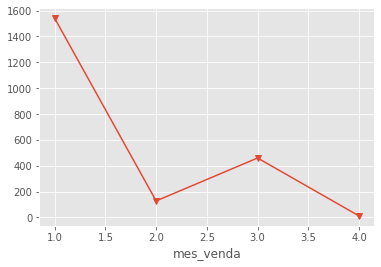

In [61]:
# Total produtos vendidos por mês 
df_2019.groupby(df_2019['mes_venda'])['Qtde'].sum().plot(marker='v')

(array([191., 193., 221.,  85.,  54.,  61.,  38.,  31.,  14.,   6.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

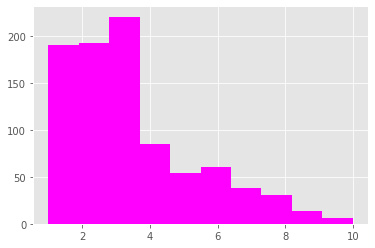

In [64]:
# Histograma
plt.hist(df['Qtde'], color='magenta')

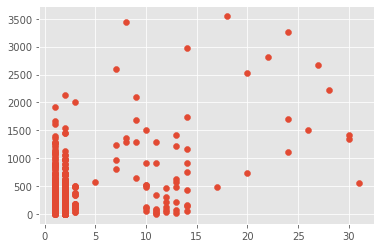

In [65]:
plt.scatter(x=df_2019['dia_venda'], y=df_2019['Receita']);

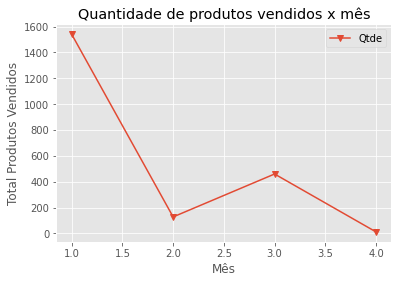

In [68]:
# Salvando em png
df_2019.groupby(df_2019['mes_venda'])['Qtde'].sum().plot(marker='v')
plt.title('Quantidade de produtos vendidos x mês')
plt.xlabel('Mês')
plt.ylabel('Total Produtos Vendidos');
plt.legend()
plt.savefig('grafico_QTDE_x_MES.png')